In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Grab dataframes for averages, drop columns for season week
aggregated_2019_df = pd.read_csv("../Data/Aggregated_2019_season.csv").drop([ "season_week"], axis=1)
aggregated_2_year_df = pd.read_csv("../Data/Aggregated_2_year_average.csv").drop([ "season_week"], axis=1)
aggregated_3_year_df = pd.read_csv("../Data/Aggregated_3_year_average.csv").drop([ "season_week"], axis=1)
aggregated_5_year_df = pd.read_csv("../Data/Aggregated_5_year_average.csv").drop([ "season_week"], axis=1)

aggregated_2019_df

,all_cause,septicemia,cancer,diabetes,Alzheimers,influenza_pneumonia,chronic_LRD,other_respiratory,kidney,NEC,heart_disease,CBVD,COVID19_UCOD
0,49532.0,631.0,10817.0,1452.0,2164.0,628.0,2474.0,827.0,906.0,598.0,11135.0,2623.0,0.0
1,50127.0,697.0,10991.0,1394.0,2178.0,674.0,2542.0,757.0,903.0,630.0,11249.0,2684.0,0.0
2,51232.0,687.0,11059.0,1487.0,2204.0,736.0,2606.0,783.0,906.0,619.0,11847.0,2689.0,0.0
3,50960.0,665.0,11001.0,1506.0,2257.0,726.0,2549.0,780.0,953.0,593.0,11739.0,2786.0,0.0
4,51078.0,665.0,10964.0,1525.0,2173.0,740.0,2695.0,813.0,911.0,589.0,11500.0,2787.0,0.0
5,52557.0,740.0,11176.0,1572.0,2295.0,774.0,2596.0,821.0,992.0,649.0,11940.0,2806.0,0.0
6,52736.0,689.0,10998.0,1598.0,2333.0,803.0,2680.0,811.0,969.0,611.0,12237.0,2831.0,0.0
7,52961.0,661.0,11008.0,1578.0,2326.0,763.0,2794.0,839.0,962.0,645.0,12270.0,2990.0,0.0
8,52269.0,690.0,10664.0,1590.0,2366.0,773.0,2732.0,858.0,947.0,618.0,12331.0,2833.0,0.0
9,53997.0,757.0,10811.0,1683.0,2403.0,947.0,2957.0,807.0,964.0,610.0,12870.0,2915.0,0.0


In [2]:
# Unexplained and explained deaths are calculated and saved as csv

dataframes = [aggregated_2019_df, aggregated_2_year_df, aggregated_3_year_df, aggregated_5_year_df]
frame_names = ["aggregated_2019", "aggregated_2_year", "aggregated_3_year", "aggregated_5_year"]

for i in range(4):
    frame = dataframes[i]
    holding_df = pd.DataFrame(columns=["Explained", "Unexplained"])
    for index, row in frame.iterrows():
        explained = row.sum()-row["all_cause"]-row["NEC"]
        unexplained = row["all_cause"] - explained
        unreported = unexplained - row["NEC"]
        
        temp_df = pd.DataFrame([[explained, unexplained, unreported]],\
                               columns = ["Explained", "Unexplained", "Total Unreported"])
        holding_df = holding_df.append(temp_df, ignore_index = True)
    holding_df.to_csv(f'../Data/{frame_names[i]}_(un)explained.csv', index=False)

In [3]:
# Explained and Unexplained columns are added to relevant dataframes
serving_df = pd.read_csv("../Data/aggregated_2019_(un)explained.csv")
aggregated_2019_df.insert(13, "Explained", serving_df["Explained"])
aggregated_2019_df.insert(14, "Unexplained", serving_df["Unexplained"])
aggregated_2019_df.insert(15, "Total Unreported", serving_df["Total Unreported"])
aggregated_2019_df.to_csv("../Data/aggregated_2019_final.csv", index=False)

serving_df = pd.read_csv("../Data/aggregated_2_year_(un)explained.csv")
aggregated_2_year_df.insert(13, "Explained", serving_df["Explained"])
aggregated_2_year_df.insert(14, "Unexplained", serving_df["Unexplained"])
aggregated_2_year_df.insert(15, "Total Unreported", serving_df["Total Unreported"])
aggregated_2_year_df.to_csv("../Data/aggregated_2_year_final.csv", index=False)

serving_df = pd.read_csv("../Data/aggregated_3_year_(un)explained.csv")
aggregated_3_year_df.insert(13, "Explained", serving_df["Explained"])
aggregated_3_year_df.insert(14, "Unexplained", serving_df["Unexplained"])
aggregated_3_year_df.insert(15, "Total Unreported", serving_df["Total Unreported"])
aggregated_3_year_df.to_csv("../Data/aggregated_3_year_final.csv", index=False)

serving_df = pd.read_csv("../Data/aggregated_5_year_(un)explained.csv")
aggregated_5_year_df.insert(13, "Explained", serving_df["Explained"])
aggregated_5_year_df.insert(14, "Unexplained", serving_df["Unexplained"])
aggregated_5_year_df.insert(15, "Total Unreported", serving_df["Total Unreported"])
aggregated_5_year_df.to_csv("../Data/aggregated_5_year_final.csv", index=False)

aggregated_2019_df

,all_cause,septicemia,cancer,diabetes,Alzheimers,influenza_pneumonia,chronic_LRD,other_respiratory,kidney,NEC,heart_disease,CBVD,COVID19_UCOD,Explained,Unexplained,Total Unreported
0,49532.0,631.0,10817.0,1452.0,2164.0,628.0,2474.0,827.0,906.0,598.0,11135.0,2623.0,0.0,33657.0,15875.0,15277.0
1,50127.0,697.0,10991.0,1394.0,2178.0,674.0,2542.0,757.0,903.0,630.0,11249.0,2684.0,0.0,34069.0,16058.0,15428.0
2,51232.0,687.0,11059.0,1487.0,2204.0,736.0,2606.0,783.0,906.0,619.0,11847.0,2689.0,0.0,35004.0,16228.0,15609.0
3,50960.0,665.0,11001.0,1506.0,2257.0,726.0,2549.0,780.0,953.0,593.0,11739.0,2786.0,0.0,34962.0,15998.0,15405.0
4,51078.0,665.0,10964.0,1525.0,2173.0,740.0,2695.0,813.0,911.0,589.0,11500.0,2787.0,0.0,34773.0,16305.0,15716.0
5,52557.0,740.0,11176.0,1572.0,2295.0,774.0,2596.0,821.0,992.0,649.0,11940.0,2806.0,0.0,35712.0,16845.0,16196.0
6,52736.0,689.0,10998.0,1598.0,2333.0,803.0,2680.0,811.0,969.0,611.0,12237.0,2831.0,0.0,35949.0,16787.0,16176.0
7,52961.0,661.0,11008.0,1578.0,2326.0,763.0,2794.0,839.0,962.0,645.0,12270.0,2990.0,0.0,36191.0,16770.0,16125.0
8,52269.0,690.0,10664.0,1590.0,2366.0,773.0,2732.0,858.0,947.0,618.0,12331.0,2833.0,0.0,35784.0,16485.0,15867.0
9,53997.0,757.0,10811.0,1683.0,2403.0,947.0,2957.0,807.0,964.0,610.0,12870.0,2915.0,0.0,37114.0,16883.0,16273.0


In [4]:
# Array holding causes of death is crafted
causes_array = aggregated_2019_df.columns[:]
causes_array

Index(['all_cause', 'septicemia', 'cancer', 'diabetes', 'Alzheimers',
       'influenza_pneumonia', 'chronic_LRD', 'other_respiratory', 'kidney',
       'NEC', 'heart_disease', 'CBVD', 'COVID19_UCOD', 'Explained',
       'Unexplained', 'Total Unreported'],
      dtype='object')

In [5]:
# Array of Titles is crafted with indexing identical to array of causes of death 
title_array = ["All-Cause", "Septicemia", "Cancer", "Diabetes", "Alzheimer Disease", "Influenza-Pneumonia",\
              "Chronic Lower Respiratory Disease", "Other Respiratory Illness", "Kidney Disease",\
              "Not Elsewhere Classified", "Heart Disease", "Cerebrovascular Disease", "Covid 19", "Explained",\
              "Unexplained", "Total Unreported"]
title_array

['All-Cause',
 'Septicemia',
 'Cancer',
 'Diabetes',
 'Alzheimer Disease',
 'Influenza-Pneumonia',
 'Chronic Lower Respiratory Disease',
 'Other Respiratory Illness',
 'Kidney Disease',
 'Not Elsewhere Classified',
 'Heart Disease',
 'Cerebrovascular Disease',
 'Covid 19',
 'Explained',
 'Unexplained',
 'Total Unreported']

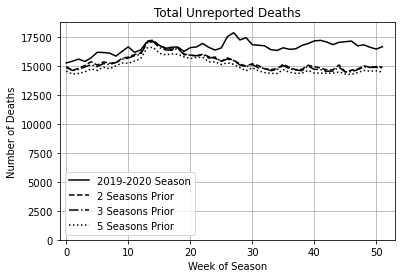

In [6]:
# Create scatterplots for all causes of death

# For loop to generate visualizations for all causes of death
for i in range(len(causes_array)):
    
    # Cause of death and relevant title grabbed
    cause = causes_array[i]
    title = title_array[i] + " Deaths"
    
    # Clear plot from last run
    plt.clf()
    
    # points are created for each season or average
    x = aggregated_2019_df.index
    y_2019 = aggregated_2019_df[cause]
    y_2 = aggregated_2_year_df[cause]
    y_3 = aggregated_3_year_df[cause]
    y_5 = aggregated_5_year_df[cause]
    
    # Points are plotted, labels made
    plt.plot(x, y_2019, ls="-", color="black", zorder=3)
    plt.plot(x, y_2, ls="--", color="black", zorder=2)
    plt.plot(x, y_3, ls="-.", color="black", zorder=2)
    plt.plot(x, y_5, ls=":", color="black", zorder=2)
    
    plt.title(title)
    plt.xlabel("Week of Season")
    plt.ylabel("Number of Deaths")
    plt.grid(True, zorder=1)
    plt.ylim([0, max(max(aggregated_2019_df[cause]),max(aggregated_2_year_df[cause]),max(aggregated_3_year_df[cause]),\
                    max(aggregated_5_year_df[cause]))*1.05])
    plt.xlim([-1,53])
    plt.legend(("2019-2020 Season", "2 Seasons Prior", "3 Seasons Prior", "5 Seasons Prior"))

    # plot is saved as a png with identifying title
    plt.savefig(f'../Visualizations/aggregated_seasons__cause_of_death_{cause}.png',format='png')